## Lecture 7 Example

**Multiple Linear Regression**

Hypothesis Testing using Matrix Approach

---

We want to build a regression model to predict rut depth in asphalt based on the data collected by Gorman and Toman (1966) concerning the rut depth of 31 asphalt pavements prepared under different conditions specified by five predictors. 
A sixth regressor, ``run``, is used as an indicator variable to separate the data into two sets of runs. The variables are as follows: 

- ``rut`` the rut depth per million wheel passes

- ``viscosity`` the viscosity of the asphalt

- ``surface`` the percentage of asphalt in the surface course

- ``base`` the percentage of asphalt in the base course

- ``run`` the run

- ``fines`` the percentage of fines in the surface course

- ``voids`` the percentage of voids in the surface course


The ``run`` predictor takes two values, 0 and 1, and is an indicator (or dummy) variable. In regression model building,
indicator variables can often present unique challenges. In many cases the relationships between the response and the other regressors change depending on the specific level of the indicator. 

***

#### Step 1

Read and visually inspect the data.

In [1]:
asphalt = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/mlr/asphalt.csv")
str(asphalt)

'data.frame':	31 obs. of  7 variables:
 $ rut      : num  6.75 13 14.75 12.6 8.25 ...
 $ viscosity: num  2.8 1.4 1.4 3.3 1.7 2.9 3.7 1.7 0.92 0.68 ...
 $ surface  : num  4.68 5.19 4.82 4.85 4.86 5.16 4.82 4.86 4.78 5.16 ...
 $ base     : num  4.87 4.5 4.73 4.76 4.95 4.45 5.05 4.7 4.84 4.76 ...
 $ run      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ fines    : num  8.4 6.5 7.9 8.3 8.4 7.4 6.8 8.6 6.7 7.7 ...
 $ voids    : num  4.92 4.56 5.32 4.87 3.78 ...


In [2]:
asphalt$run = as.factor(asphalt$run)  # run is a categorical variable
str(asphalt)

'data.frame':	31 obs. of  7 variables:
 $ rut      : num  6.75 13 14.75 12.6 8.25 ...
 $ viscosity: num  2.8 1.4 1.4 3.3 1.7 2.9 3.7 1.7 0.92 0.68 ...
 $ surface  : num  4.68 5.19 4.82 4.85 4.86 5.16 4.82 4.86 4.78 5.16 ...
 $ base     : num  4.87 4.5 4.73 4.76 4.95 4.45 5.05 4.7 4.84 4.76 ...
 $ run      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ fines    : num  8.4 6.5 7.9 8.3 8.4 7.4 6.8 8.6 6.7 7.7 ...
 $ voids    : num  4.92 4.56 5.32 4.87 3.78 ...


In [3]:
# a function that computes correlations
panel.cor = function(x, y, ...)
{
  par(usr = c(0, 1, 0, 1))
  txt = as.character(format(cor(x, y), digits=2))
  text(0.5, 0.5, txt, cex=1.5)
}

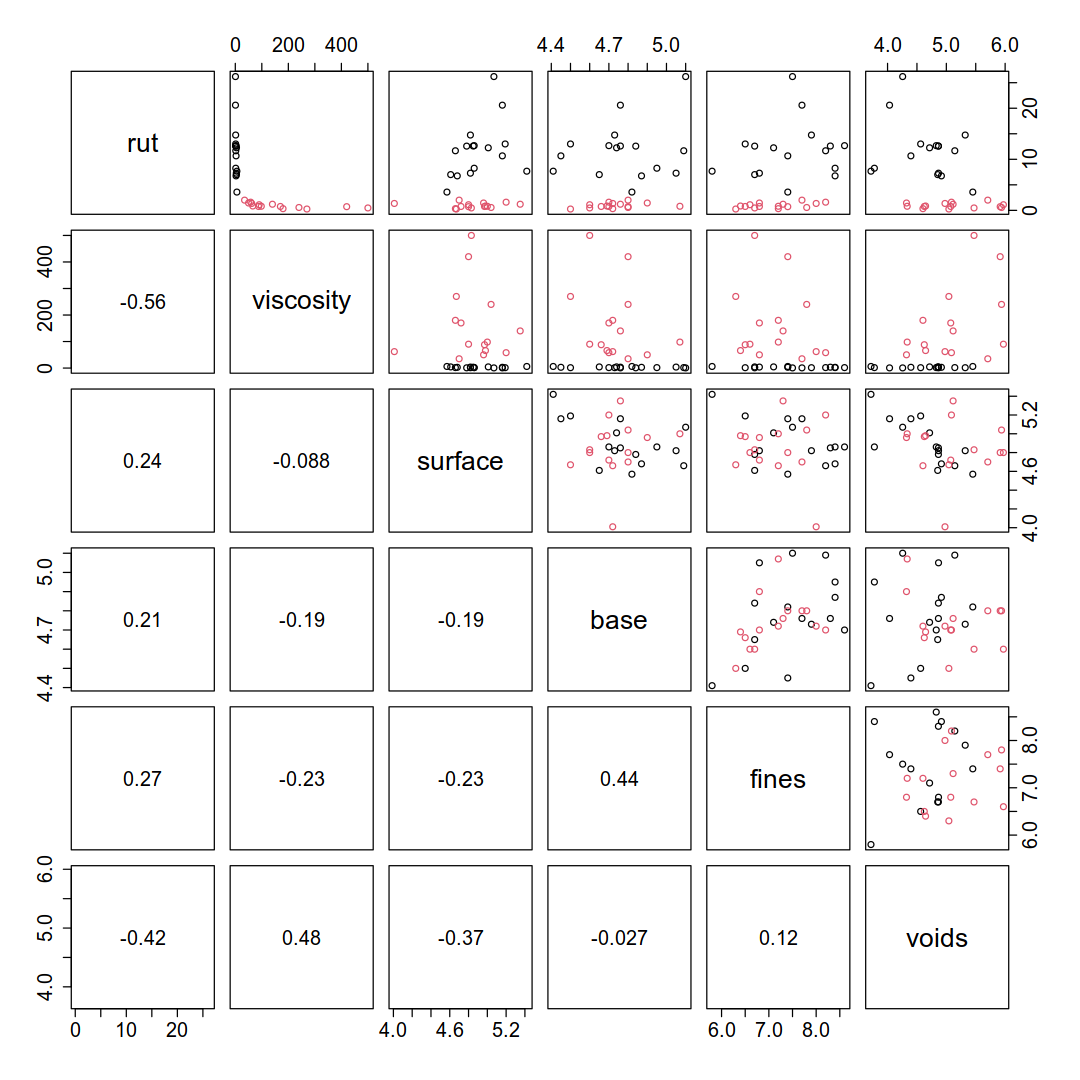

In [4]:
options(repr.plot.width=9, repr.plot.height=9)

pairs(rut ~ viscosity + surface + base + fines + voids, data = asphalt, 
      col = asphalt$run, 
      lower.panel=panel.cor, 
      cex.axis=1.5, cex.labels=2
     )

*Look at the ``rut`` versus ``viscosity`` plot - they require a suitable transformation.*

_ _ _

#### Step 2

Log transform ``rut`` and ``viscosity`` variables

In [5]:
asphalt$lrut = log(asphalt$rut)
asphalt$lviscosity = log(asphalt$viscosity)

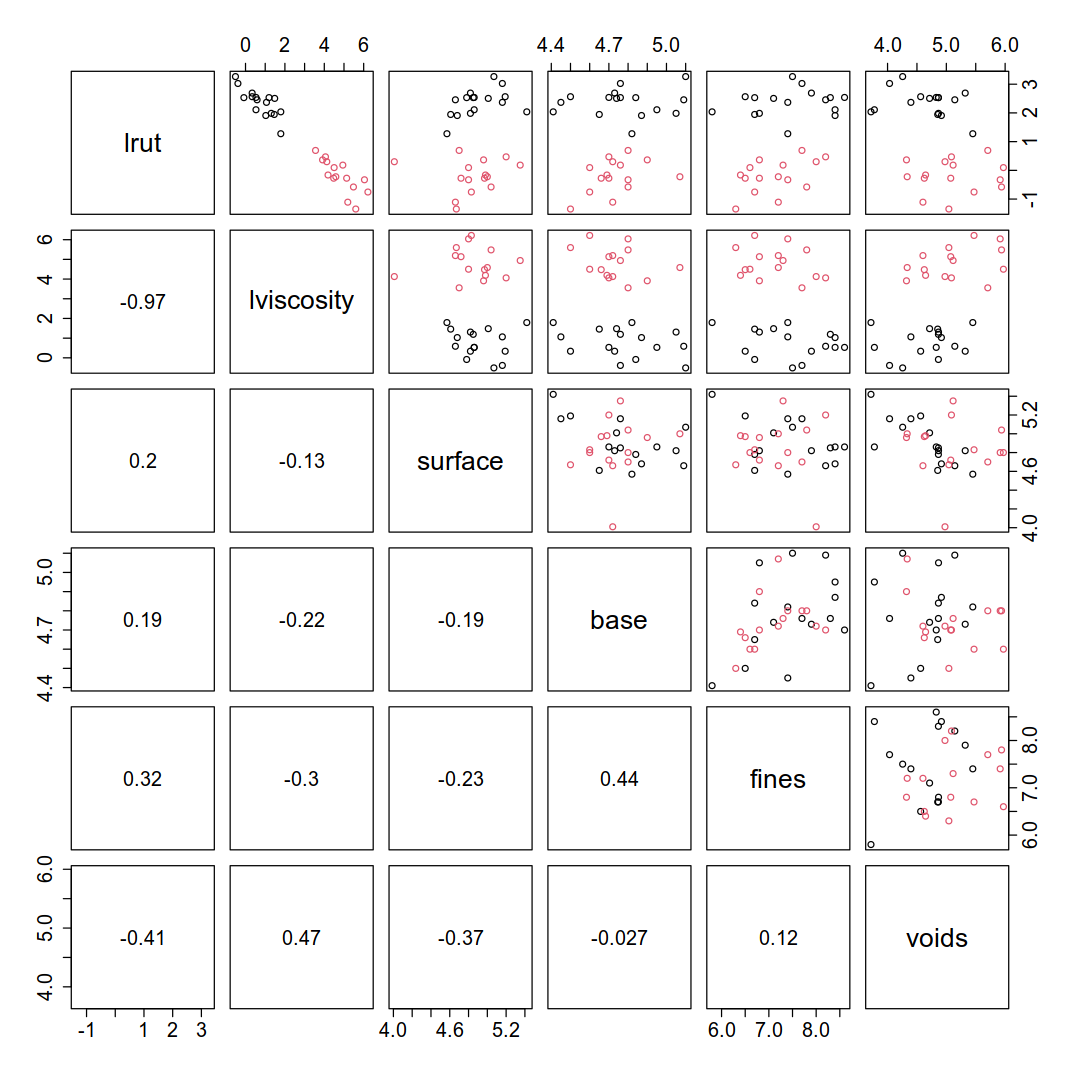

In [6]:
options(repr.plot.width=9, repr.plot.height=9)

pairs(lrut ~ lviscosity + surface + base + fines + voids, data = asphalt, 
      col = asphalt$run, 
      lower.panel=panel.cor, 
      cex.axis=1.5, cex.labels=2
     )

*The ``lrut`` versus ``lviscosity`` relationship looks linear. However there's an outlier that needs to be removed.*

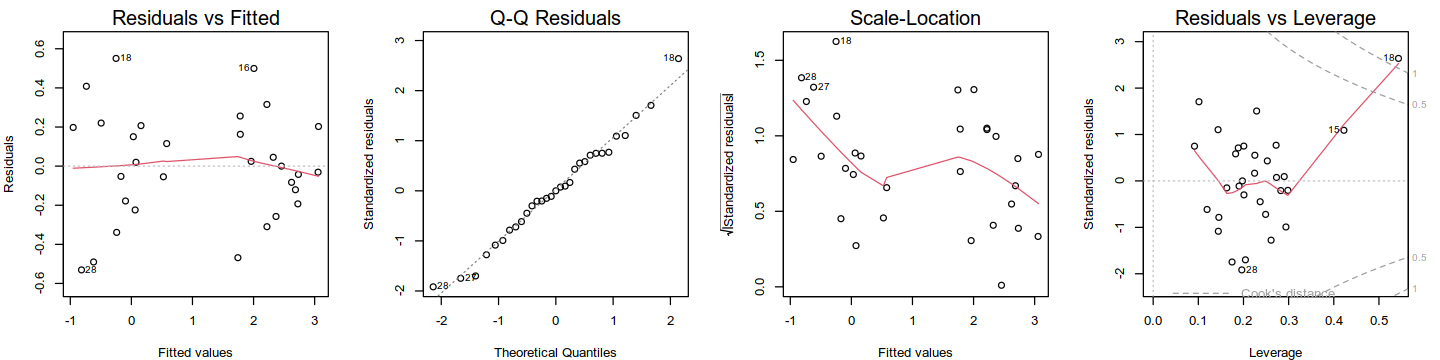

In [7]:
model = lm(lrut ~ lviscosity + surface + base + fines + voids + run, data=asphalt)

options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(1,4), mar=c(4,4,2,2))
plot(model)

Cases 15, 18, and 28 need to be examined further.

In [8]:
r = rstandard(model)   # standardised residuals
Outliers = abs(r) > 2  # outliers is a logical vector (FALSE, FALSE, TRUE, ...) indicating outliers

cat("There are", sum(Outliers), "outliers", "\n")
cat("Outlier cases are:", which(Outliers),collapse=" ")

There are 1 outliers 
Outlier cases are: 18  

In [9]:
p = 6                      # the number of predictors
n = length(asphalt$lrut)   # the number of cases
h = hatvalues(model)       
Leverages = h > 2*(p+1)/n  # leverages is a logical vector (FALSE, FALSE, TRUE, ...) indicating leverage points

cat("There are", sum(Leverages), "leverages", "\n")
cat("Leverage cases are:", which(Leverages),collapse=" ")

There are 1 leverages 
Leverage cases are: 18  

In [10]:
BadLeverages  = Outliers & Leverages     # bad leverage = outlier + leverage
GoodLeverages = (!Outliers) & Leverages  # good leverages = not-outlier + leverage

cat("There are", sum(BadLeverages), "bad leverages and", sum(GoodLeverages), "good leverages \n")
cat("Bad leverage cases are:", which(BadLeverages),collapse=" ", "\n")
cat("Good leverage cases are:", which(GoodLeverages),collapse=" ", "\n")

There are 1 bad leverages and 0 good leverages 
Bad leverage cases are: 18   
Good leverage cases are:    


In [11]:
D = cooks.distance(model)    # Cook's distance
p = 6                        # the number of predictors 
CooksCutOff = D > 4/(n-p-1)  # Cook's cut-off distance

cat("There are", sum(CooksCutOff), "highly influential cases \n")
cat("The influential cases are:", which(CooksCutOff),collapse=" ")

There are 1 highly influential cases 
The influential cases are: 18  

In [12]:
# remove case (row) 18
asphalt = asphalt[-18,]

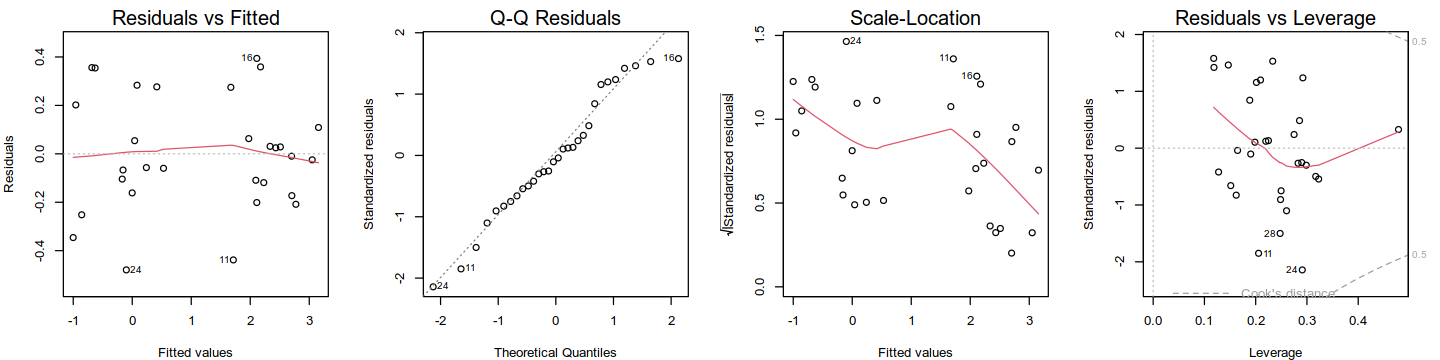

In [13]:
model = lm(lrut ~ lviscosity + surface + base + fines + voids + run, data=asphalt)

options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(1,4), mar=c(4,4,2,2))
plot(model)

There are no cases left that require further examination.

_ _ _

#### Step 3

Construct the design matrix X for the model ``lrut ~ lviscosity + surface + base + fines + voids + run`` and find estimated values of the corresponding regression parameters. Then verify your results using the built-in statistical functions.

The design matrix is

$$
X = \begin{bmatrix} 1 & x_{11} & x_{12} & \dots & x_{1p} \\ 1 & x_{21} & x_{22} & \dots & x_{2p} \\ \vdots & \vdots & \vdots && \vdots\\ 1 & x_{n1} & x_{n2} & \dots & x_{np} \end{bmatrix} 
$$

The estimated values of the regression parameters are given by

$$
\hat{\vec\beta} = C X^T \vec y \qquad C = (X^T X)^{-1}
$$

In [14]:
n = nrow(asphalt)
X = with(asphalt, cbind(rep(1,n), lviscosity, surface, base, fines, voids, run))
head(X)

,lviscosity,surface,base,fines,voids,run
1,1.0296194,4.68,4.87,8.4,4.916,1
1,0.3364722,5.19,4.50,6.5,4.563,1
1,0.3364722,4.82,4.73,7.9,5.321,1
1,1.1939225,4.85,4.76,8.3,4.865,1
1,0.5306283,4.86,4.95,8.4,3.776,1
1,1.0647107,5.16,4.45,7.4,4.397,1


In [15]:
y = asphalt$lrut
C = solve( t(X) %*% X )
beta = C %*% t(X) %*% y
beta

,-5.16969589
lviscosity,-0.51154924
surface,1.14591700
base,0.24322731
fines,0.03901231
voids,0.31811285
run,-0.63176439


In [16]:
# verify our computations
model = lm(lrut ~ lviscosity + surface + base + fines + voids + run, data=asphalt)
model


Call:
lm(formula = lrut ~ lviscosity + surface + base + fines + voids + 
    run, data = asphalt)

Coefficients:
(Intercept)   lviscosity      surface         base        fines        voids  
   -5.80146     -0.51155      1.14592      0.24323      0.03901      0.31811  
       run1  
   -0.63176  


_ _ _

#### Step 4

Test the overall significance of regression assuming $\alpha = 5\%$ and find $R^2$ and $R^2_{adj}$. You will need to use the following formulas:

$$
SS_R = \vec y^T H y - n \bar y^2 \qquad
SS_E = \vec y^T ( I-H ) \vec y \qquad
SS_T = \vec y^T \vec y - n \bar y^2 \qquad
H = X (X^T X)^{-1} X^T
$$

$$
MS_R = \frac{SS_R}{p} \qquad
MS_E = \frac{SS_E}{n-p-1} \qquad
MS_T = \frac{SS_T}{n-1}
$$


$$
F = \frac{MS_R}{MS_E} \qquad 
R^2 = 1 - \frac{SS_E}{SS_T} \qquad
R^2_{adj} = 1 - \frac{MS_E}{MS_T}
$$

In [17]:
# Hat matrix
H = X %*% solve( t(X) %*% X ) %*% t(X)
str(H)

 num [1:30, 1:30] 0.162 -0.05 0.0769 0.1388 0.1572 ...


In [18]:
p = 6 # the number of predictors

y = asphalt$lrut

SSR = as.numeric( y %*% H %*% y ) - n * mean(y)^2
SSE = as.numeric( y %*% ( diag(n) - H )%*% y )
SST = sum(y^2) - n * mean(y)^2

MSR = SSR / p
MSE = SSE / (n-p-1)
MST = SST / (n-1)

F = MSR/MSE
PF = 1-pf(F,p,n-p-1)

In [19]:
# ANOVA table - see Table 3 on p.14 of the Lecture Notes
dp=3
table.anova = data.frame(row.names=c("Regression","Residual","Total"), 
                         dof=c(p,n-p-1,n-1), 
                         SS=c(SSR,SSE,SST),
                         MS=c(MSR,MSE,NA),
                         F=c(F,NA,NA),
                         P=c(PF,NA,NA)
                        )
round(table.anova,dp)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Regression,6,56.309,9.385,132.874,0
Residual,23,1.624,0.071,NA,NA
Total,29,57.933,NA,NA,NA


In [20]:
# verify our computations
model.null = lm(lrut~1, data=asphalt)
round(anova(model.null,model),dp)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,57.933,NA,NA,NA,NA
2,23,1.624,6,56.309,132.874,0


In [21]:
# R-squared and R-squared-adjusted
R2 = 1 - SSE/SST
R2.adj = 1 - MSE/MST
round(data.frame(R2,R2.adj),dp)

R2,R2.adj
<dbl>,<dbl>
0.972,0.965


_ _ _

#### Step 5

Conduct individual $t$-tests for significance of individual regression coefficients. You will need to use the following formulas:

$$
T = \frac{\hat\beta_j}{\text{se}(\hat\beta_j)} \sim t_{n-p-1} \qquad
\text{se}(\hat\beta_j) = \sqrt{ \hat\sigma^2 c_{jj} }
$$

In [22]:
beta.se = sqrt(MSE * diag(C))
T = beta/beta.se
PT = 2*pt(-abs(T),n-p-1)

dp = 3
table.beta = data.frame(Estimate=round(beta,dp),
                        Error=round(beta.se,dp),
                        Tvalue=round(T,dp),
                        Pvalue=round(PT,dp)
                        )
names(table.beta) = c("Estimate", "Std. Error", "t-value", "P-value")
table.beta

,Estimate,Std. Error,t-value,P-value
,<dbl>,<dbl>,<dbl>,<dbl>
,-5.170,2.428,-2.129,0.044
lviscosity,-0.512,0.075,-6.816,0.000
surface,1.146,0.271,4.227,0.000
base,0.243,0.337,0.722,0.478
fines,0.039,0.083,0.469,0.644
voids,0.318,0.113,2.820,0.010
run,-0.632,0.307,-2.059,0.051


*We can see that predictors ``base`` and ``fines`` may be insignificant. We will test this hypothesis using a partial F-test in the next step.* 

In [23]:
# verify our computations
summary(model)


Call:
lm(formula = lrut ~ lviscosity + surface + base + fines + voids + 
    run, data = asphalt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47946 -0.15080 -0.01736  0.17862  0.39407 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.80146    2.51161  -2.310 0.030217 *  
lviscosity  -0.51155    0.07505  -6.816 5.96e-07 ***
surface      1.14592    0.27107   4.227 0.000319 ***
base         0.24323    0.33700   0.722 0.477722    
fines        0.03901    0.08319   0.469 0.643515    
voids        0.31811    0.11282   2.820 0.009719 ** 
run1        -0.63176    0.30677  -2.059 0.050947 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2658 on 23 degrees of freedom
Multiple R-squared:  0.972,	Adjusted R-squared:  0.9646 
F-statistic: 132.9 on 6 and 23 DF,  p-value: < 2.2e-16


_ _ _

#### Step 6

Conduct a partial $F$-test to test the significance of ``base`` and ``fines`` predictors. You will need to use the following formulas:

$$
SS^{extra}_R = SS^{red}_E - SS^{full}_E \qquad
SS^{red}_E = \vec y^T ( I-H^{red} ) \vec y
$$

$$
F = \frac{MS^{extra}_R}{MS^{full}_E} \sim F_{r,n-p-1} \qquad
MS^{extra}_R = \frac{SS^{extra}_R}{r}
$$

In [24]:
# design and hat matrices for the reduced model
X.red = with(asphalt, cbind(rep(1,n), lviscosity, surface, voids, run))
H.red = X.red %*% solve( t(X.red) %*% X.red ) %*% t(X.red)

In [25]:
r = 2 # the number of extra predictors

SSE.red = as.numeric( y %*% ( diag(n) - H.red )%*% y )

SSR.extra = SSE.red - SSE
MSR.extra = SSR.extra / r

F.extra = MSR.extra/MSE
PF.extra = 1-pf(F.extra,r,n-p-1)

In [26]:
# ANOVA table for the partial F-test - see Table 4 on p.16 of the Lecture Notes
table.extra = data.frame(row.names=c("Residual Reduced","Residual Full","Extra"), 
                         dof=c(n-p+r-1,n-p-1,r), 
                         SS=c(SSE.red,SSE,SSR.extra),
                         MS=c(NA,MSE,MSR.extra),
                         F=c(NA,NA,F.extra),
                         P=c(NA,NA,PF.extra)
                        )
round(table.extra,dp)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Residual Reduced,25,1.707,NA,NA,NA
Residual Full,23,1.624,0.071,NA,NA
Extra,2,0.083,0.041,0.586,0.564


In [27]:
# verify our results
model.red = lm(lrut~lviscosity + surface + voids + run, data=asphalt)
round(anova(model.red, model),dp)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25,1.707,NA,NA,NA,NA
2,23,1.624,2,0.083,0.586,0.564


_ _ _

#### Step 7

Test the overall significance of regression assuming $\alpha = 5\%$ and find the adjusted coefficient of determination, $R^2_{adj}$ of the reduced model.

In [28]:
SSR.red = as.numeric( y %*% H.red %*% y ) - n * mean(y)^2
SSE.red = as.numeric( y %*% ( diag(n) - H.red )%*% y )

MSR.red = SSR.red / (p-r)
MSE.red = SSE.red / (n-p+r-1)

F.red  = MSR.red/MSE.red
PF.red = 1-pf(F.red,p-r,n-p+r-1)

In [29]:
# ANOVA table for the reduced model - see Table 3 on p.14 of the Lecture Notes
table.anova.reduced = data.frame(row.names=c("Regression","Residual","Total"), 
                                 dof=c(p-r,n-p+r-1,n-1), 
                                 SS=c(SSR.red,SSE.red,SST),
                                 MS=c(MSR.red,MSE.red,NA),
                                 F=c(F.red,NA,NA),
                                 P=c(PF.red,NA,NA)
                                )
round(table.anova.reduced,dp)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Regression,4,56.226,14.057,205.826,0
Residual,25,1.707,0.068,NA,NA
Total,29,57.933,NA,NA,NA


In [30]:
# verify our results
anova(model.null, model.red)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,57.933497,NA,NA,NA,NA
2,25,1.707331,4,56.22617,205.8263,9.675344e-19


In [31]:
summary(model.red)


Call:
lm(formula = lrut ~ lviscosity + surface + voids + run, data = asphalt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43309 -0.15252 -0.02222  0.18318  0.40605 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.9900     1.5190  -2.627 0.014512 *  
lviscosity   -0.5444     0.0675  -8.066 2.02e-08 ***
surface       1.0665     0.2512   4.246 0.000263 ***
voids         0.3302     0.1053   3.137 0.004336 ** 
run1         -0.5293     0.2849  -1.858 0.075008 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2613 on 25 degrees of freedom
Multiple R-squared:  0.9705,	Adjusted R-squared:  0.9658 
F-statistic: 205.8 on 4 and 25 DF,  p-value: < 2.2e-16


In [32]:
# R-squared and R-squared-adjusted for the reduced model
R2.red = 1 - SSE.red/SST
R2.adj.red = 1 - MSE.red/MST
round(data.frame(R2.red,R2.adj.red),dp)

R2.red,R2.adj.red
<dbl>,<dbl>
0.971,0.966


_ _ _

#### Step 8

Compare the overall significance of regression, $F$, the estimated variance, $\hat\sigma^2 = MS_E$, and the coefficients of determination, $R^2$ and $R^2_{adj}$, of the full and the reduced models.

In [33]:
# comparison table
table.compare = data.frame(row.names=c("Full model","Reduced model"),
                           F=c(F,F.red),
                           MSE=c(MSE,MSE.red),
                           R2=c(R2,R2.red),
                           R2.adj=c(R2.adj,R2.adj.red)
                          )
round(table.compare,dp)

,F,MSE,R2,R2.adj
,<dbl>,<dbl>,<dbl>,<dbl>
Full model,132.874,0.071,0.972,0.965
Reduced model,205.826,0.068,0.971,0.966


We can see that the reduced model has a higher F-value, a smaller $\hat\sigma^2$, and a marginally higher $R^2_{adj}$. Moreover, it is a simple model than the full model. Thus we conclude that the reduced model is a better (more parsimonious) model for predicting rut depth.

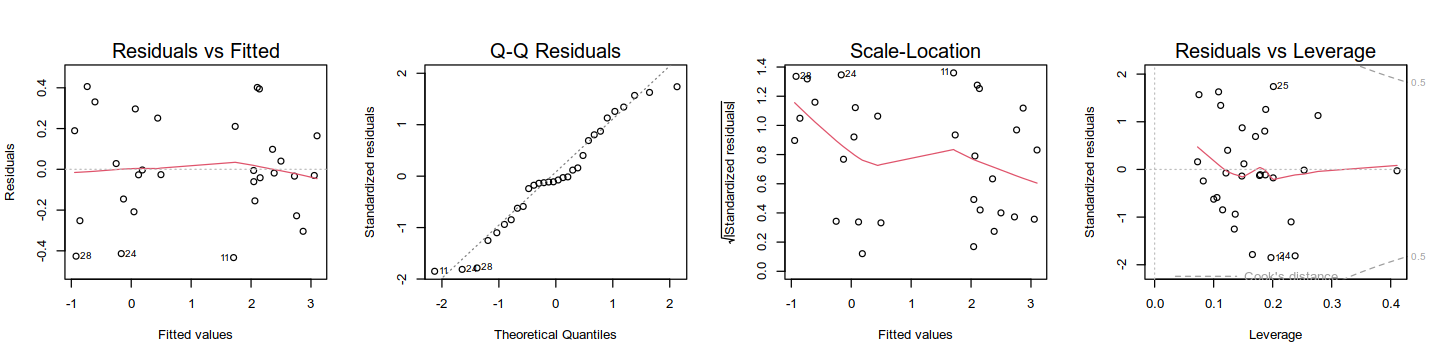

In [34]:
# a "basic" residual analysis
options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(1,4))
plot(model.red)

_ _ _

#### Extra

Find the best model for predicting ``lrut`` according to the Akaike Information Criterion (AIC).

*This topic will be discussed next week.*

In [35]:
library(MASS)

In [36]:
# find the "best" model
stepAIC(model)

Start:  AIC=-73.48
lrut ~ lviscosity + surface + base + fines + voids + run

             Df Sum of Sq    RSS     AIC
- fines       1    0.0155 1.6400 -75.195
- base        1    0.0368 1.6613 -74.808
<none>                    1.6245 -73.480
- run         1    0.2996 1.9240 -70.403
- voids       1    0.5616 2.1860 -66.573
- surface     1    1.2622 2.8867 -58.233
- lviscosity  1    3.2818 4.9062 -42.321

Step:  AIC=-75.19
lrut ~ lviscosity + surface + base + voids + run

             Df Sum of Sq    RSS     AIC
- base        1    0.0673 1.7073 -75.988
<none>                    1.6400 -75.195
- run         1    0.2956 1.9356 -72.223
- voids       1    0.6889 2.3289 -66.674
- surface     1    1.2841 2.9241 -59.846
- lviscosity  1    3.4712 5.1113 -43.093

Step:  AIC=-75.99
lrut ~ lviscosity + surface + voids + run

             Df Sum of Sq    RSS     AIC
<none>                    1.7073 -75.988
- run         1    0.2357 1.9430 -74.108
- voids       1    0.6720 2.3793 -68.031
- surface    


Call:
lm(formula = lrut ~ lviscosity + surface + voids + run, data = asphalt)

Coefficients:
(Intercept)   lviscosity      surface        voids         run1  
    -3.9900      -0.5444       1.0665       0.3302      -0.5293  


---